In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
import wquantiles # used to calculate the wighted quantiles
from statsmodels import robust # for calculating the mean absolute deviaition
from scipy.stats import norm

In [2]:
df = pd.read_csv("C:\\Users\\sageo\\OneDrive\\Desktop\\machine learning\\train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\sageo\AppData\Local\Temp\ipykernel_34096\1892392761.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co = df.corr()


<Axes: >

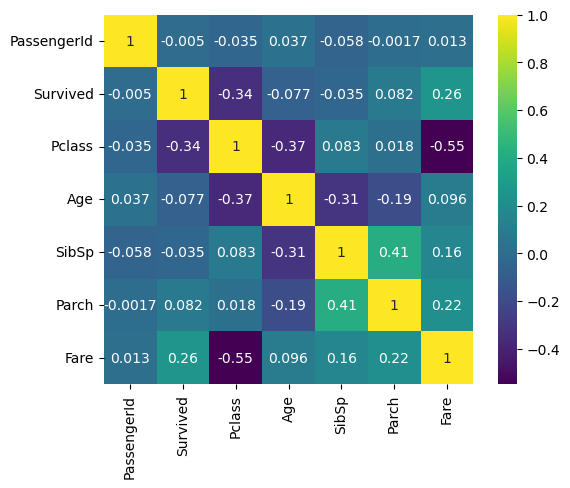

In [4]:
co = df.corr()
sns.heatmap(data=co, annot = True, square = True, cmap = 'viridis')

# Univariate Analysis 

# Column - Age - Conclusion
<br>
* Age is almost normally distributed<br>
* 20% OF the values are missing<br>
* There are some outliers<br>

In [5]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

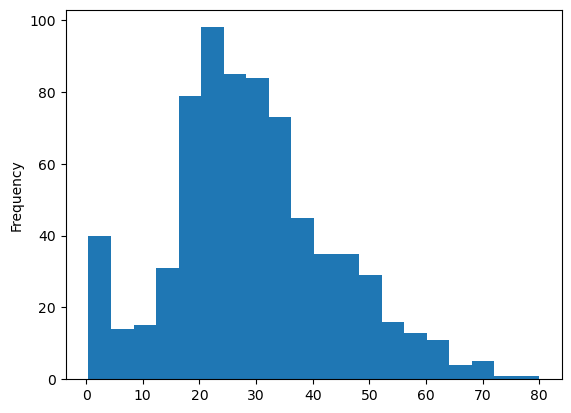

In [6]:
df['Age'].plot(kind='hist',bins=20)

In [50]:
df['Age'].skew()

0.38910778230082704

<Axes: ylabel='Density'>

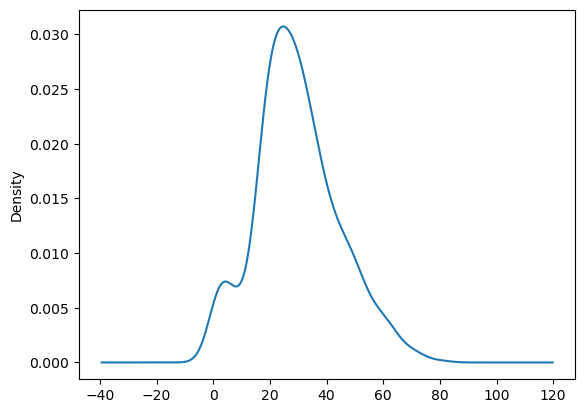

In [7]:
df['Age'].plot(kind='kde')

C:\Users\sageo\AppData\Local\Temp\ipykernel_34096\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

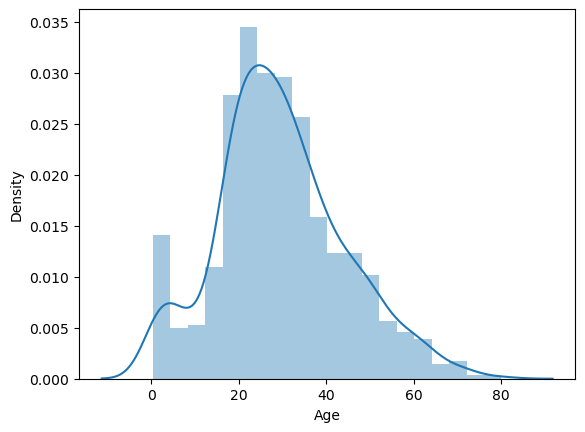

In [8]:
sns.distplot(df['Age'])

In [9]:
df['Age'].skew()  # checking skewness

0.38910778230082704

<Axes: >

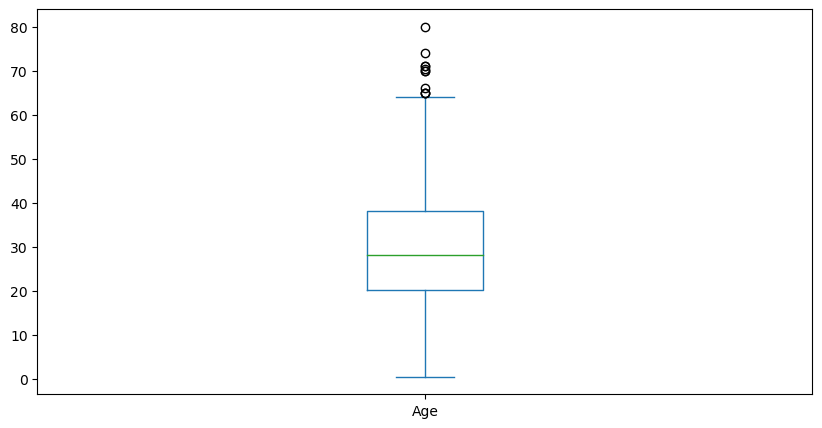

In [10]:
plt.figure(figsize=(10,5))
df['Age'].plot(kind='box')

In [11]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [12]:
df['Age'].isnull().sum()/len(df['Age'])*100

19.865319865319865

# Column - Fare - Conclusion
<br>
- Highly positively skewed<br>
- Outliers present<br>
- Ticket price is total of group people as ticket number are same<br>
- No missing values<br>
- need to know individual fare

In [13]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

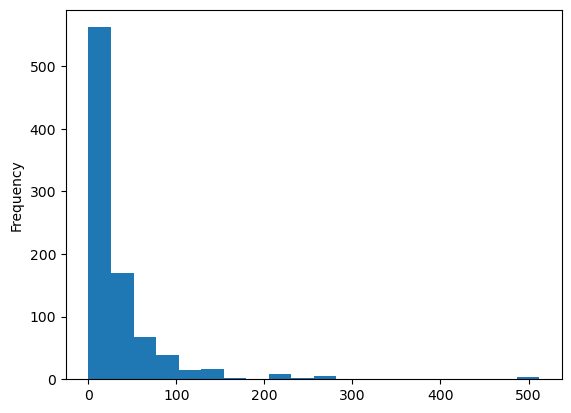

In [14]:
df['Fare'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

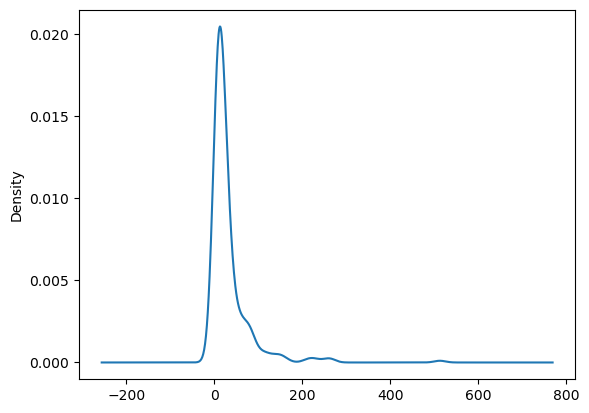

In [15]:
df['Fare'].plot(kind='kde')

In [16]:
df['Fare'].skew() # highly positively skewd

4.787316519674893

<Axes: >

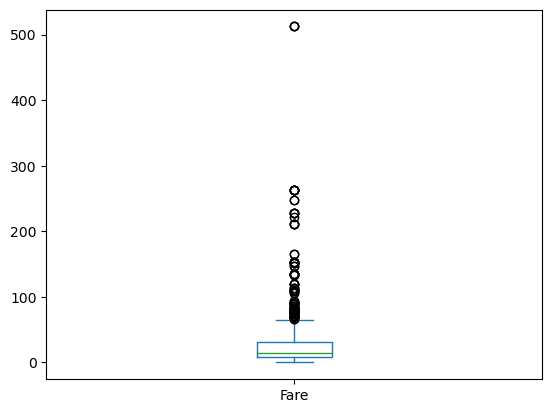

In [17]:
df['Fare'].plot(kind='box')

In [18]:
df[df['Fare']>200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [52]:
df[df['Fare']<100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
df['Fare'].isnull().sum()

0

# Survived Conclusion<br>
- There are no missing vlaues<br>
- Only 38.4% survived<br>

In [20]:
df['Survived'].value_counts() # .value_counts() gives frequency distribution

0    549
1    342
Name: Survived, dtype: int64

<Axes: >

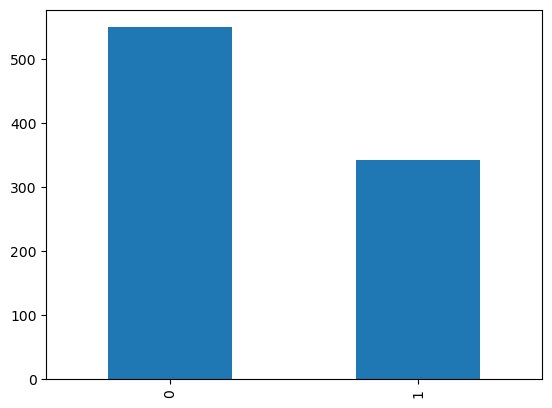

In [21]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='Survived'>

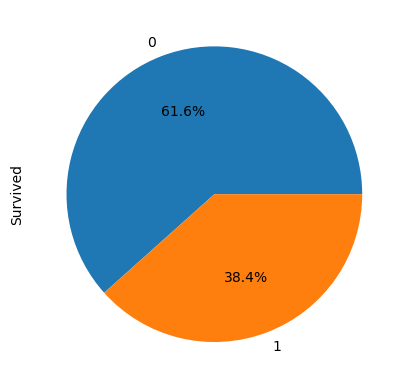

In [22]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [23]:
df['Survived'].isnull().sum()

0

# Pclass Conclusion
- 

In [24]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: >

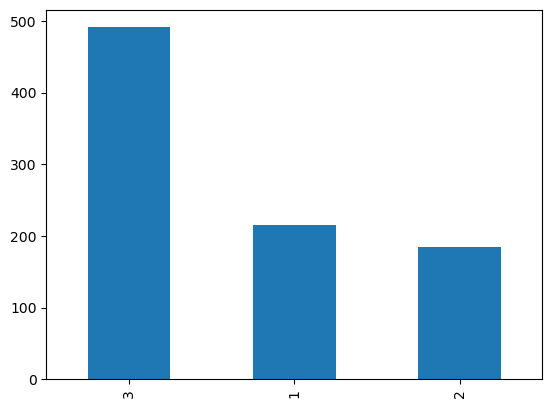

In [25]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='Pclass'>

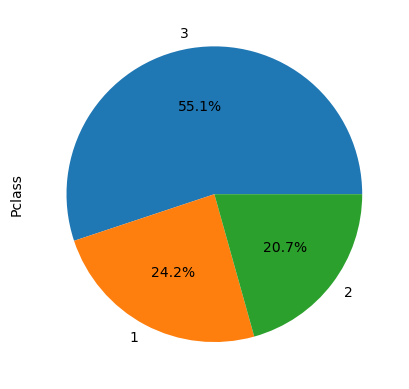

In [26]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [27]:
df['Pclass'].isnull().sum()

0

# Sex Conclusion<br>
- No of male is higher than no of females (which is normal)
- No missing values

In [28]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: >

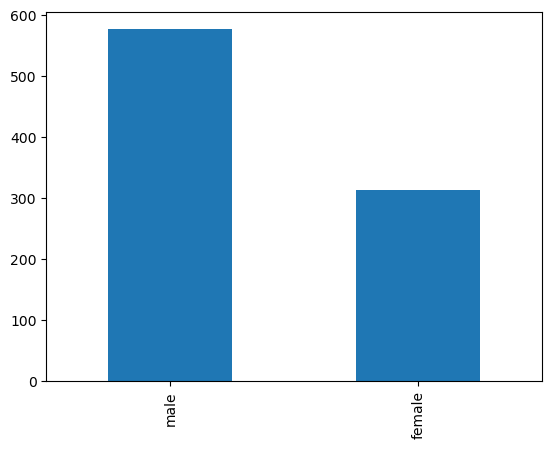

In [29]:
df['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='Sex'>

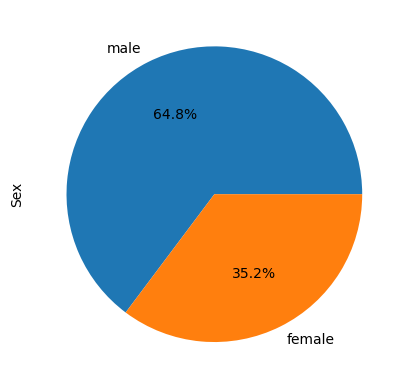

In [30]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [31]:
df['Sex'].isnull().sum()

0

# Sibsp Conclusion
- No of people traveling alone are higher<br>
- No missing values

In [32]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: >

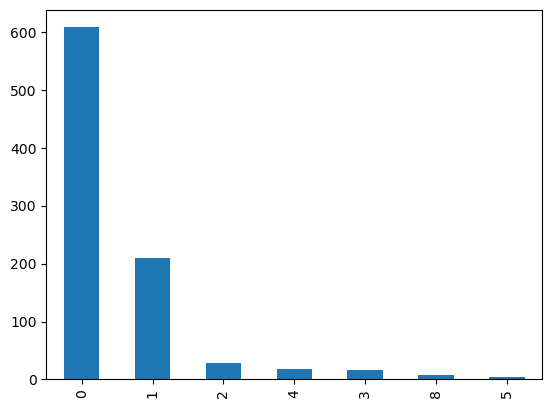

In [33]:
df['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='SibSp'>

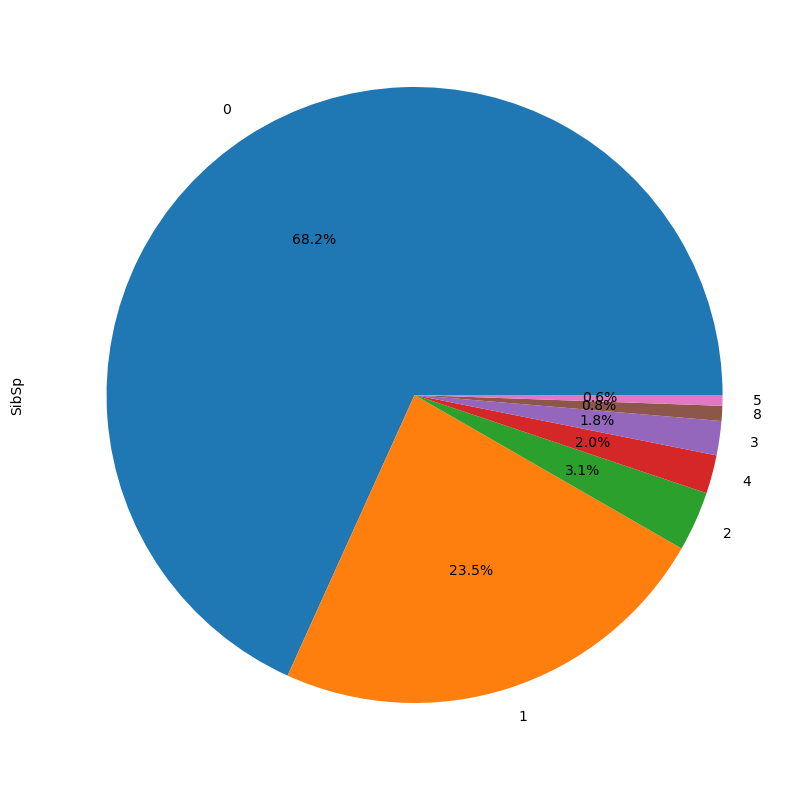

In [34]:
plt.figure(figsize=(15,10))
df['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [35]:
df['SibSp'].isnull().sum()

0

# Parch Conclusion
- More people are travelling alone (without parent child)<br>
- No missing value

In [36]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<Axes: >

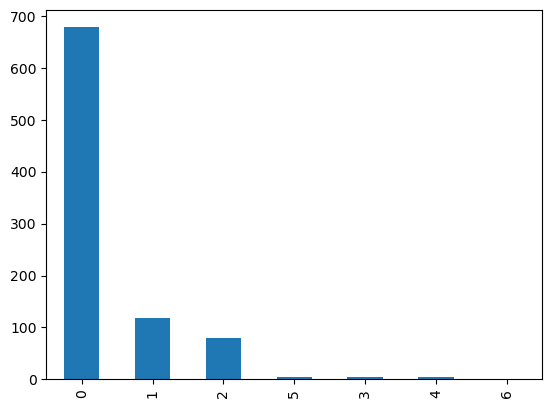

In [37]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='Parch'>

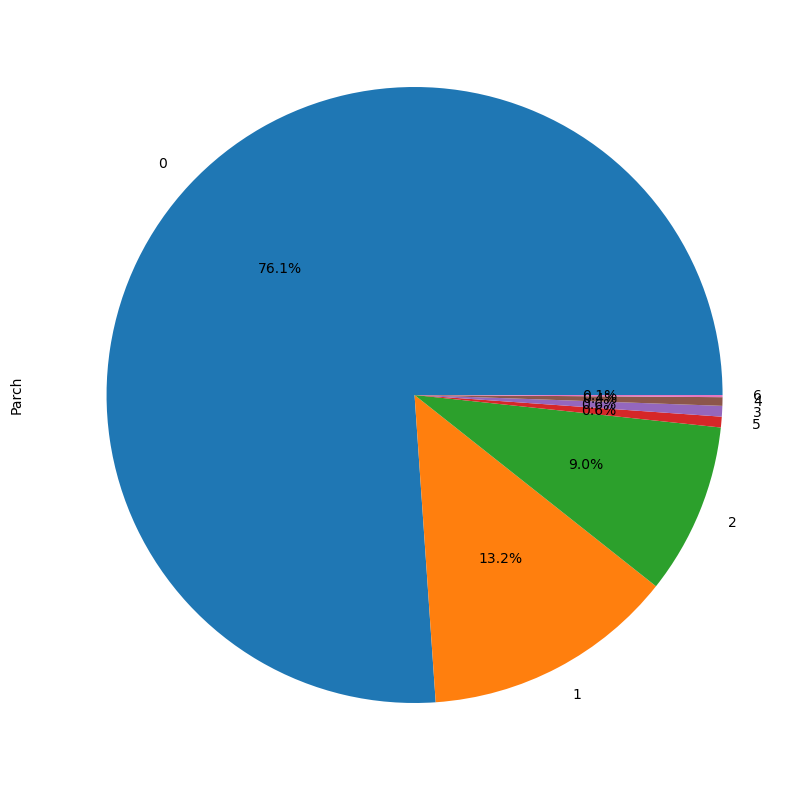

In [38]:
plt.figure(figsize=(15,10))
df['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [39]:
df['Parch'].isnull().sum()

0

# Embarked Conclusion
- Count of people s are more<br>
- Only two missing values

In [40]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: >

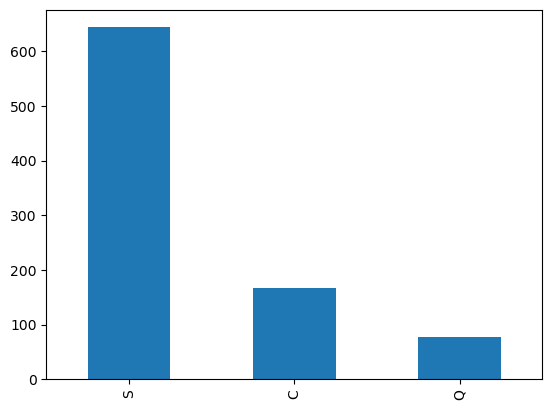

In [41]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='Embarked'>

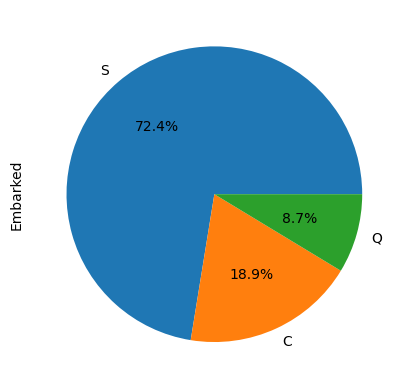

In [42]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [43]:
df['Embarked'].isnull().sum()/len(df['Embarked'])*100

0.22446689113355783

# Bivariate Analysis 
- Analysis in combination between two variables

In [44]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Survived and Pclass Conclusion 
- Safest class was Pclass 1 and the most dangerous one was Pclass 3 as 62% survived in Pclass1 and only 24% in Pclass3 

In [45]:
pd.crosstab(df['Survived'],df['Pclass'])   # pd.crosstab creates contigency table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [46]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100   # pd.crosstab creates contigency table (percent wise)

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

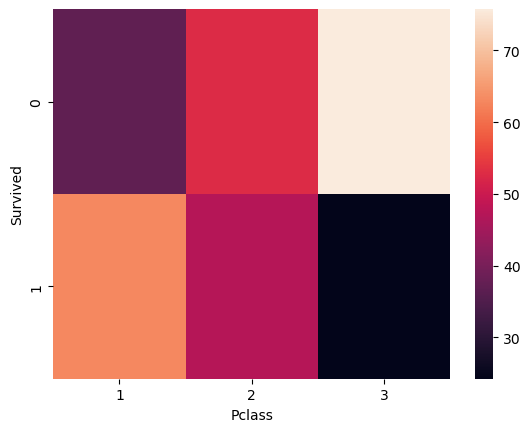

In [47]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

# Survived and Sex Conclusion
-

In [48]:
pd.crosstab(df['Survived'],df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [49]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815
